# <b> PROJECT </b>: Hand Written Digit Recognition using Convolution Neural Network 

## <b>Objective:</b> The goal is to create a neural network that recognizes handwritten digits.

### Dataset: https://www.kaggle.com/competitions/digit-recognizer/data

In [62]:
# Imprting the Libraries  :
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [3]:
# Loading the dataset :

train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_data.head(4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Splitting the predictors and Responce Variables :
x = train_data.drop('label', axis = 1)
y  = train_data['label']
print (f'''
Shape of Predictors         : {x.shape}
Shape of Responce Variable  : {y.shape}

''')

print ('Predictors data:\n')
display(x.head())

print ('Response data:\n')
display(y.head())


Shape of Predictors         : (42000, 784)
Shape of Responce Variable  : (42000,)


Predictors data:



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Responce data:



0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
# Standardizing the Predictors Data:
scalar = MinMaxScaler()
x_std = scalar.fit_transform(x)

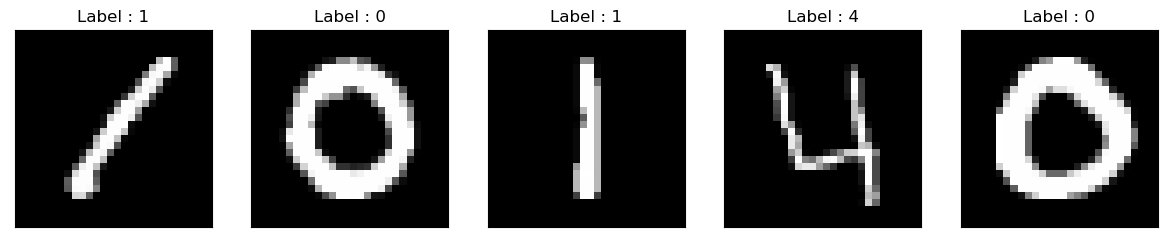

In [6]:
# Visualizing some Examples:
plt.figure(figsize= (30,20))

for index , (image, label) in enumerate (zip(x_std[:5], y[:5])):
    plt.subplot(1,10,index+1)
    plt.imshow(x_std[index].reshape(28,28), cmap = 'gray')
    plt.title(f'Label : {label}')
    plt.xticks([])
    plt.yticks([])


In [7]:
# Splitting the train and testing Data:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, train_size = 0.75, random_state = 41)

## MODELING 

## 1) Using ANN (Artificial Neural Network)
> Build and fit fully- connected network (FCN).

In [8]:
# INITIATING THE ANN MODEL

nodes = 100
activation = 'relu'
output_activation = 'softmax'

epochs = 100
batch_size = 64
validation_size = 0.25

# Initiating the Sequential Model:
model_ann= tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(784,)),
        tf.keras.layers.Dense(nodes, activation=activation),
        tf.keras.layers.Dense(nodes, activation=activation),
        tf.keras.layers.Dense(nodes, activation=activation),
        tf.keras.layers.Dense(10, activation=output_activation)
    ]
)

# Compile the model
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


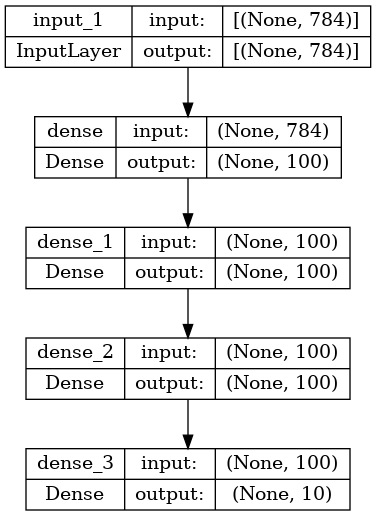

In [9]:
# Visualizing the keras model we have built 

tf.keras.utils.plot_model(model_ann,show_shapes= True)

In [10]:
 # Fitting the model on the training data

history_ann = model_ann.fit(x_train, y_train, batch_size= batch_size, validation_split= 0.25, epochs = 100)

Epoch 1/100
370/370 [==============================] - 6s 5ms/step - loss: 0.4216 - accuracy: 0.8784 - val_loss: 0.2491 - val_accuracy: 0.9261
Epoch 2/100
370/370 [==============================] - 1s 4ms/step - loss: 0.1619 - accuracy: 0.9520 - val_loss: 0.1816 - val_accuracy: 0.9459
Epoch 3/100
370/370 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.9646 - val_loss: 0.1585 - val_accuracy: 0.9548
Epoch 4/100
370/370 [==============================] - 1s 4ms/step - loss: 0.0819 - accuracy: 0.9736 - val_loss: 0.1426 - val_accuracy: 0.9583
Epoch 5/100
370/370 [==============================] - 1s 4ms/step - loss: 0.0613 - accuracy: 0.9801 - val_loss: 0.1413 - val_accuracy: 0.9610
Epoch 6/100
370/370 [==============================] - 1s 4ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.1409 - val_accuracy: 0.9608
Epoch 7/100
370/370 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.1537 - val_accuracy: 0.9596

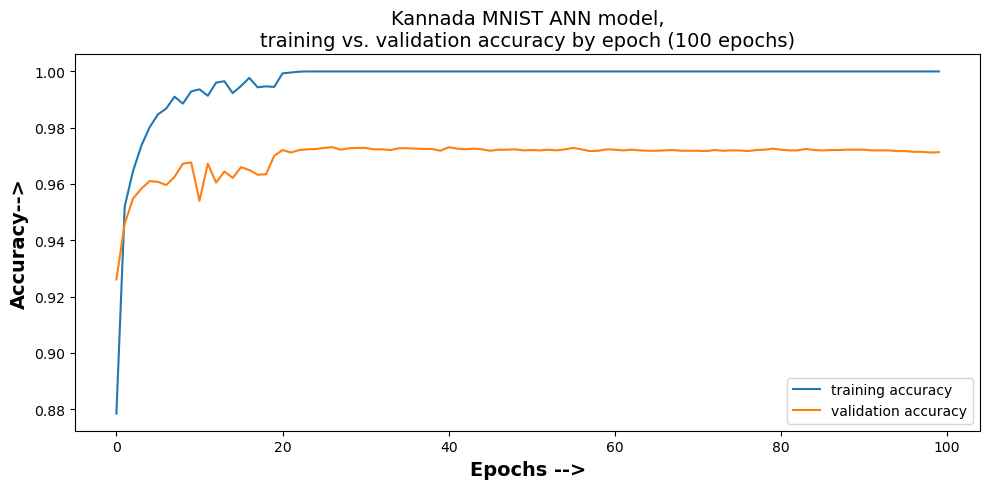

In [12]:
# PLOTTING THE TRAINING AND VALIDATION ACCURACY:
len(history_ann.history['accuracy'])
plt.figure(figsize = (10,5))

plt.plot(np.arange(0,100,1), history_ann.history['accuracy'], label = 'training accuracy')
plt.plot(np.arange(0,100,1), history_ann.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs -->',fontsize=14, fontweight = 'bold')
plt.ylabel('Accuracy-->',fontsize=14, fontweight = 'bold')
plt.title(
    "Kannada MNIST ANN model,\ntraining vs. validation "
    "accuracy by epoch ({0:,} epochs)".format(100),fontsize=14)
plt.legend()
plt.tight_layout()

> <b> Based on the training and validation accuracy plot above, we can see that our model is overfitting. Very rapidly (in fewer than 25 epochs) our model learns to predict our fitted training observations with perfect accuracy, whereas the score on our validation set plateaus in nearly the same number of epochs.

### <b> REGULARIZING THE ANN MODEL TO GENERALIZE THE DATA EFFICIENTLY.

In [20]:
# Set early Stopping conditions :

early_stop = tf.keras.callbacks.EarlyStopping(
            monitor= 'val_loss',
            min_delta = 0,
            verbose = 1,
            patience = 10,
            restore_best_weights = True         
)

# dropout, batch_size and regularization parameters:

dropout = 0.15
batch_size = 64
epochs = 1000
kernal_weight = 0.003
bais_weight = 0.003

# Optimizing parameter:
learning_rate = 0.005
beta1 = 0.9
beta2 = 0.999
amsgrad = False

In [22]:
# initiating model building with same architure as above but with rgularizations and droupouts.

model_regularized = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(784,)),
        tf.keras.layers.Dense(nodes, activation=activation,
                             kernel_regularizer= tf.keras.regularizers.l2(kernal_weight),
                             bias_regularizer = tf.keras.regularizers.l2(bais_weight)),
        tf.keras.layers.Dropout(dropout),
        
        tf.keras.layers.Dense(nodes, activation=activation,
                             kernel_regularizer= tf.keras.regularizers.l2(kernal_weight),
                             bias_regularizer = tf.keras.regularizers.l2(bais_weight)),
        tf.keras.layers.Dropout(dropout),
        
        tf.keras.layers.Dense(nodes, activation=activation,
                             kernel_regularizer= tf.keras.regularizers.l2(kernal_weight),
                             bias_regularizer = tf.keras.regularizers.l2(bais_weight)),
        tf.keras.layers.Dropout(dropout),
        
        tf.keras.layers.Dense(10, activation=output_activation)
    ]
)

# optimizing 'adam' step size 
optimizer = tf.keras.optimizers.Adam(
    learning_rate= learning_rate,
    beta_1=beta1,
    beta_2=beta2,
    amsgrad=amsgrad
)

# Compile the model
model_regularized.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_regularized.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)               

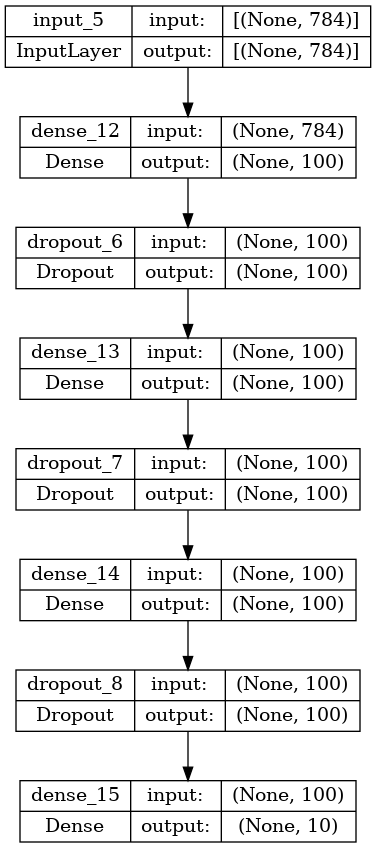

In [23]:
# Visualizing the keras model we have built 

tf.keras.utils.plot_model(model_regularized,show_shapes= True)

In [24]:
 # Fitting the model on the training data

history_regularized = model_regularized.fit(x_train, y_train, 
                                            batch_size= batch_size, 
                                            validation_split= 0.25, 
                                            epochs = epochs, 
                                            verbose = 0, 
                                            callbacks = [early_stop])

Restoring model weights from the end of the best epoch: 26.
Epoch 36: early stopping


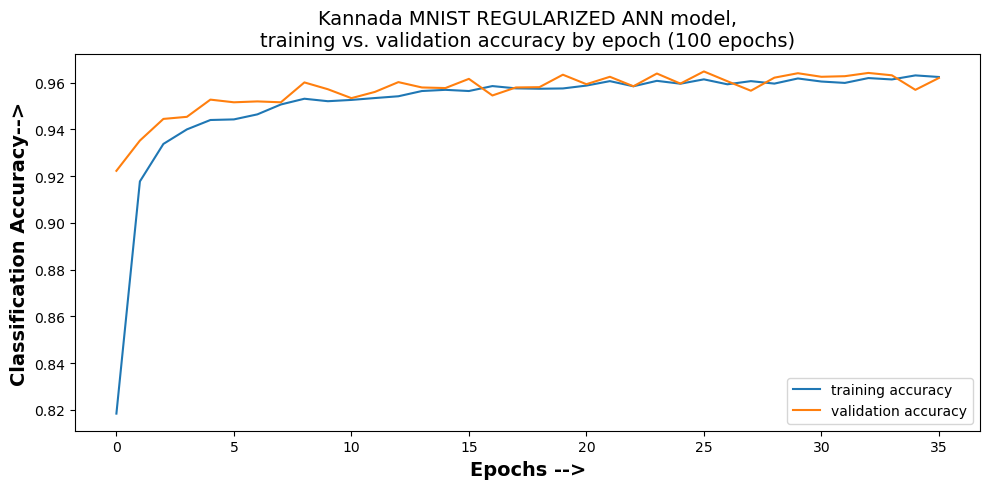

In [139]:
# PLOTTING THE TRAINING AND VALIDATION ACCURACY FOR REGULARIZED MODEL:
# len(history_regularized.history['accuracy'])
plt.figure(figsize = (10,5))

plt.plot(np.arange(0,len(history_regularized.history['accuracy']),1), history_regularized.history['accuracy'], label = 'training accuracy')
plt.plot(np.arange(0,len(history_regularized.history['accuracy']),1), history_regularized.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs -->',fontsize=14, fontweight = 'bold')
plt.ylabel('Classification Accuracy-->',fontsize=14, fontweight = 'bold')
plt.title(
    "Kannada MNIST REGULARIZED ANN model,\ntraining vs. validation "
    "accuracy by epoch ({0:,} epochs)".format(100),fontsize=14)
plt.legend()
plt.tight_layout()

><b> Here the Regularized model is doing pretty well. It is generalising the data and giving a great accuracy of around 96%.

In [43]:
# Now evaluating on the original training dataset for reference :

train_loss, train_acc = model_regularized.evaluate(x_train, y_train, verbose = 0)
print (f'''
Evaluating whole TRAINING DATA:
> Loss    : {train_loss:.3f}
> Accuracy: {(train_acc* 100):.3f} %
''')


Evaluating whole TRAINING DATA:
> Loss    : 0.238
> Accuracy: 97.733 %



## <b> CLASSIFICATION USING CNN MODEL

In [85]:
# Initializing the Regularized CNN model:

# Reshaping the data to a 4d tensor:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


# Defining the model architecture
model_cnn = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=3, strides=(1,1), padding='valid', 
                data_format=None, dilation_rate=(1, 1), groups=1, activation="relu", use_bias=True, 
                kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                kernel_constraint=None, bias_constraint=None, name = "conv1", 
                input_shape=(28,28,1) ),
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, strides=(1,1), padding='valid', 
                data_format=None, dilation_rate=(1, 1), groups=1, activation="relu", use_bias=True, 
                kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                kernel_constraint=None, bias_constraint=None, name = "conv2"),
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, kernel_size=3, strides=(1,1), padding='valid', 
                data_format=None, dilation_rate=(1, 1), groups=1, activation="relu", use_bias=True, 
                kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                kernel_constraint=None, bias_constraint=None, name = "conv3"),
    keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu',kernel_initializer='glorot_uniform', bias_initializer='zeros', 
              kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
              kernel_constraint=None, bias_constraint=None,  name="Hidden3"),
    keras.layers.Dense(units=10, activation='softmax', name = 'output')
])

model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                      

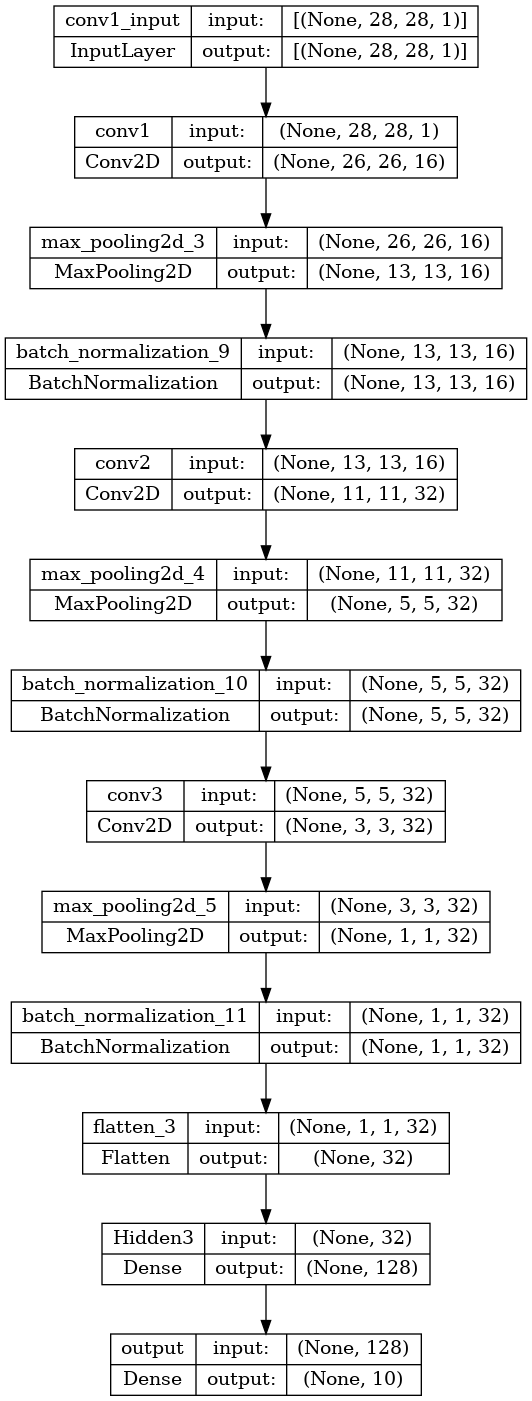

In [86]:
# Visualizing the keras model we have built 

tf.keras.utils.plot_model(model_cnn
                          ,show_shapes= True)

In [87]:
# Compiling the model by optimizing it :

patience = 50
call_back = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=patience,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

optimizer = keras.optimizers.Adam(learning_rate = 0.0005)

model_cnn.compile(
    optimizer = optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# Training the Model on the Trainig Data:
history_cnn = model_cnn.fit(x_train, y_train, 
                            batch_size= batch_size, 
                            validation_split= 0.25, 
                            epochs = 1000, 
                            verbose = 0, 
                            callbacks = [call_back])

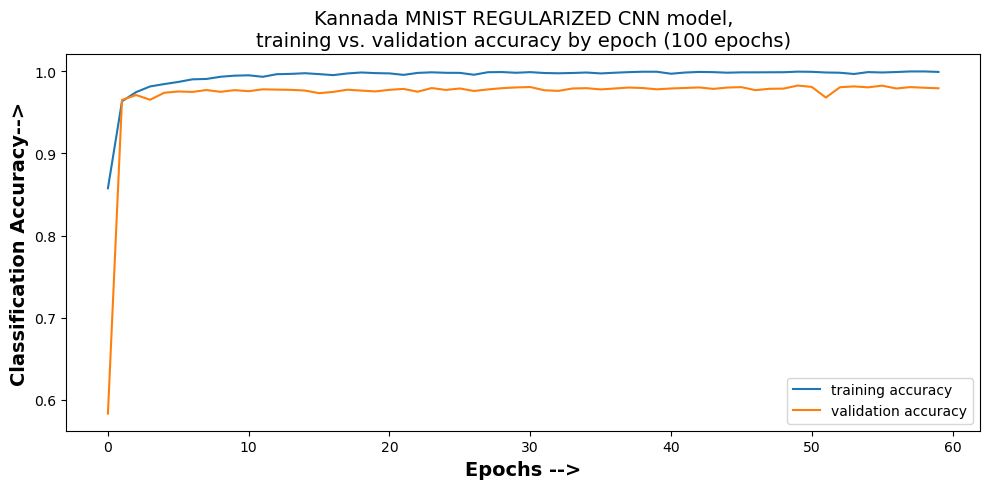

In [138]:
# PLOTTING THE TRAINING AND VALIDATION ACCURACY FOR REGULARIZED CNN MODEL:
# len(history_regularized.history['accuracy'])
plt.figure(figsize = (10,5))

plt.plot(np.arange(0,len(history_cnn.history['accuracy']),1), history_cnn.history['accuracy'], label = 'training accuracy')
plt.plot(np.arange(0,len(history_cnn.history['accuracy']),1), history_cnn.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs -->',fontsize=14, fontweight = 'bold')
plt.ylabel('Classification Accuracy-->',fontsize=14, fontweight = 'bold')
plt.title(
    "Kannada MNIST REGULARIZED CNN model,\ntraining vs. validation "
    "accuracy by epoch ({0:,} epochs)".format(100),fontsize=14)
plt.legend()
plt.tight_layout()

In [96]:
# Now evaluating on the original training dataset for reference :

train_loss, train_acc = model_cnn.evaluate(x_test, y_test, verbose = 0)
print (f'''
Evaluating whole TEST DATA:
> Loss    : {train_loss:.3f}
> Accuracy: {(train_acc* 100):.3f} %
''')


Evaluating whole TEST DATA:
> Loss    : 0.084
> Accuracy: 97.667 %



In [97]:
# NOW PLOTTING THE TEST IMAGES WITH THE PREDICTED LABELS:

y_test_pred = model_cnn.predict(x_test)
prediction = [np.argmax(preds) for preds in y_test_pred]



329/329 [==============================] - 1s 2ms/step


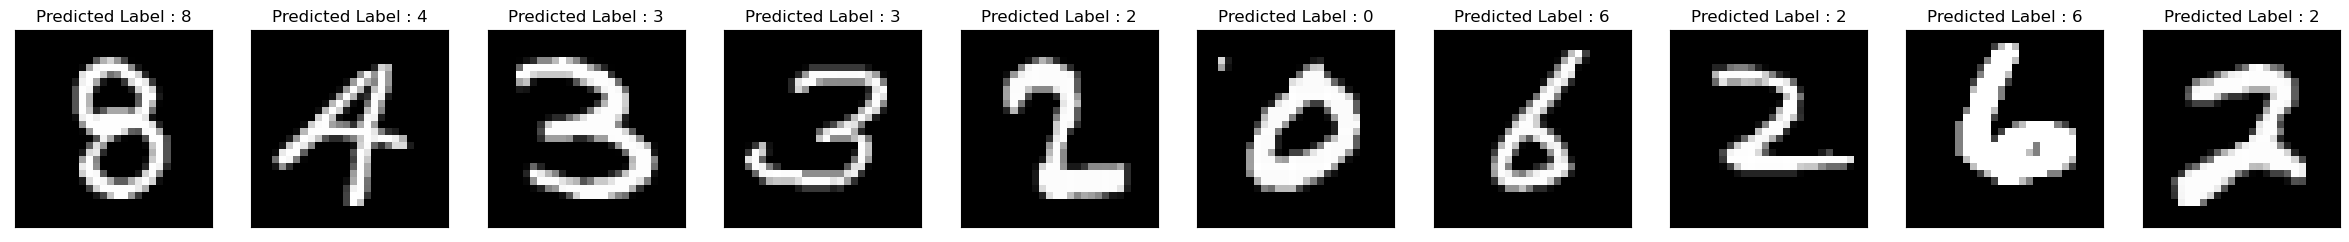

In [104]:
# Visualizing some TEST Examples:
plt.figure(figsize= (30,20))

for index , (image, label) in enumerate (zip(x_test[:10], prediction[:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(x_test[index].reshape(28,28), cmap = 'gray')
    plt.title(f'Predicted Label : {label}')
    plt.xticks([])
    plt.yticks([])

# <b> GETTING PREDICTIONS FOR ACTUAL TEST SET GIVEN BY KAGGLE :


In [106]:
# Loading the test Dataset:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
print (test_data.shape)
test_data.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> <b> We have 28000 unlabelled data.

In [117]:
# Scaling the Data :
test_data_std = scalar.fit_transform(test_data)

# Reshapng the data:
test_data_std = test_data_std.reshape(test_data_std.shape[0], 28, 28, 1)

In [122]:
# Getting the Predictions :

test_preds = model_cnn.predict(test_data_std)
test_preds = [np.argmax(pred) for pred in test_preds]

875/875 [==============================] - 2s 2ms/step


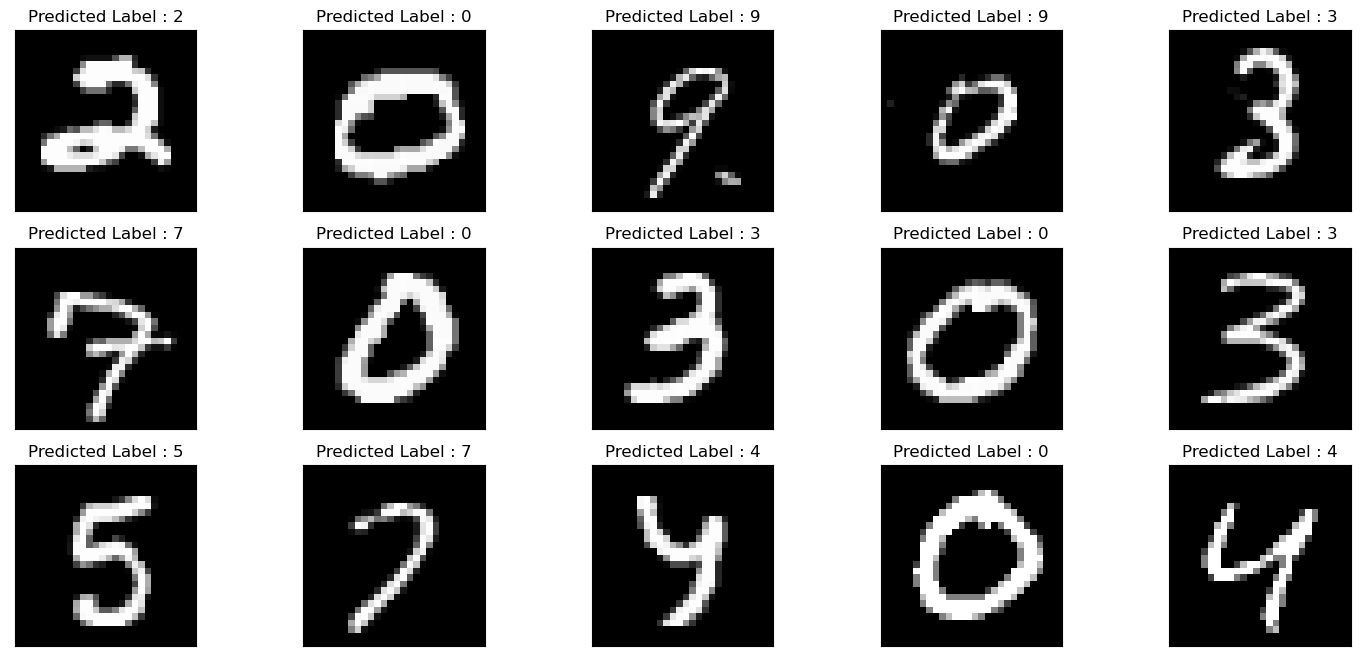

In [137]:
# Visualizing the results for kaggle test set:

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(18,8))
ax= ax.ravel()

for index , (image, label) in enumerate (zip(test_data_std[:15], test_preds[:15])):

    ax[index].imshow(test_data_std[index], cmap = 'gray')
    ax[index].set_title(f'Predicted Label : {label}')

    # Remove the axis labels
    ax[index].set_xticks([])
    ax[index].set_yticks([])

## <b> We are achieving impressive results with our trained model. Out of the 15 examples we selected from the test set and visualized using plt.subplots, only one image was misclassified. This indicates that our model is performing well and can accurately predict the labels of handwritten digits from the MNIST dataset.

_________________________